0
Creando un Forest Fire network con 20000 nodi...
Nodi: 20000, Collegamenti: 108036, Burning probability: 0.5


Computing: 100%|███████████████████████████████████████████████████████████████████████| 20/20 [01:21<00:00,  4.06s/it]


Average time for flpa: 0.4213 seconds +- 0.0458.
Average time for asyn. lpa: 1.682 seconds +- 0.354.
Average time for syn. lpa: 1.9586 seconds +- 0.0971.
1
Creando un Forest Fire network con 30000 nodi...
Nodi: 30000, Collegamenti: 166080, Burning probability: 0.5


Computing: 100%|███████████████████████████████████████████████████████████████████████| 20/20 [01:57<00:00,  5.86s/it]


Average time for flpa: 0.6521 seconds +- 0.0502.
Average time for asyn. lpa: 2.6992 seconds +- 0.4812.
Average time for syn. lpa: 2.5119 seconds +- 0.046.
2
Creando un Forest Fire network con 40000 nodi...
Nodi: 40000, Collegamenti: 245993, Burning probability: 0.5


Computing: 100%|███████████████████████████████████████████████████████████████████████| 20/20 [03:03<00:00,  9.19s/it]


Average time for flpa: 0.9109 seconds +- 0.1014.
Average time for asyn. lpa: 4.1997 seconds +- 0.7786.
Average time for syn. lpa: 4.0741 seconds +- 0.1335.
3
Creando un Forest Fire network con 50000 nodi...
Nodi: 50000, Collegamenti: 340551, Burning probability: 0.5


Computing: 100%|███████████████████████████████████████████████████████████████████████| 20/20 [03:38<00:00, 10.93s/it]


Average time for flpa: 1.225 seconds +- 0.1426.
Average time for asyn. lpa: 5.2968 seconds +- 1.1929.
Average time for syn. lpa: 4.4115 seconds +- 0.1083.
4
Creando un Forest Fire network con 60000 nodi...
Nodi: 60000, Collegamenti: 382227, Burning probability: 0.5


Computing: 100%|███████████████████████████████████████████████████████████████████████| 20/20 [04:34<00:00, 13.72s/it]


Average time for flpa: 1.5675 seconds +- 0.1273.
Average time for asyn. lpa: 6.6824 seconds +- 1.4414.
Average time for syn. lpa: 5.4717 seconds +- 0.1436.
5
Creando un Forest Fire network con 70000 nodi...
Nodi: 70000, Collegamenti: 459110, Burning probability: 0.5


Computing: 100%|███████████████████████████████████████████████████████████████████████| 20/20 [05:29<00:00, 16.47s/it]


Average time for flpa: 1.806 seconds +- 0.1503.
Average time for asyn. lpa: 7.7661 seconds +- 1.2727.
Average time for syn. lpa: 6.8963 seconds +- 0.1476.
6
Creando un Forest Fire network con 80000 nodi...
Nodi: 80000, Collegamenti: 627290, Burning probability: 0.5


Computing: 100%|███████████████████████████████████████████████████████████████████████| 20/20 [07:06<00:00, 21.33s/it]


Average time for flpa: 2.295 seconds +- 0.3026.
Average time for asyn. lpa: 9.7045 seconds +- 1.9683.
Average time for syn. lpa: 9.3307 seconds +- 0.1857.
7
Creando un Forest Fire network con 90000 nodi...
Nodi: 90000, Collegamenti: 627796, Burning probability: 0.5


Computing: 100%|███████████████████████████████████████████████████████████████████████| 20/20 [07:38<00:00, 22.91s/it]


Average time for flpa: 2.6334 seconds +- 0.2393.
Average time for asyn. lpa: 10.8771 seconds +- 2.2896.
Average time for syn. lpa: 9.3952 seconds +- 0.4949.
8
Creando un Forest Fire network con 100000 nodi...
Nodi: 100000, Collegamenti: 778799, Burning probability: 0.5


Computing: 100%|███████████████████████████████████████████████████████████████████████| 20/20 [09:26<00:00, 28.35s/it]


Average time for flpa: 3.0908 seconds +- 0.332.
Average time for asyn. lpa: 12.144 seconds +- 1.8452.
Average time for syn. lpa: 13.1129 seconds +- 0.2738.


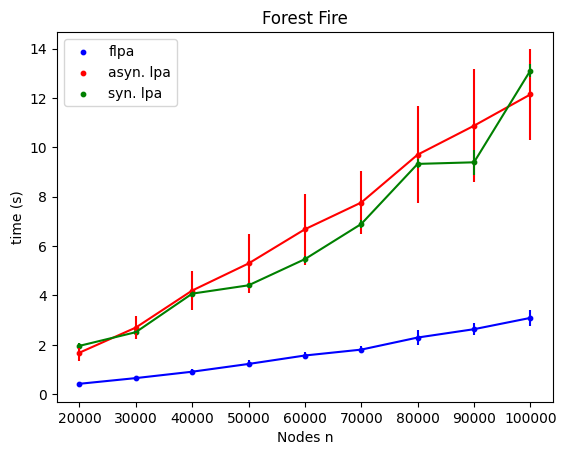

In [1]:
#Plotting the computing times for the LPA asyn., LPA syn., FLPA on a Forest Fire synthetic network
#with increasing number of nodes and fixed burning probability

import random
import networkx as nx
import matplotlib.pyplot as plt
import timeit
from tqdm import tqdm
import numpy as np

##Generating the synthetic Forest Fire networks
def forest_fire_graph(n, burning_prob):
    G = nx.DiGraph()  
    G.add_node(0)  # Initialize the first node

    for new_node in range(1, n):
        # Choosing a random node to start the "fire"
        ambassador = random.choice(list(G.nodes))
        G.add_node(new_node)
        G.add_edge(new_node, ambassador)
        
        #Propagating the fire with a burning probability
        frontier = [ambassador]
        while frontier:
            next_frontier = []
            for node in frontier:
                neighbors = list(G.neighbors(node))
                random.shuffle(neighbors)
                for neighbor in neighbors:
                    if random.random() < burning_prob:
                        G.add_edge(new_node, neighbor)
                        next_frontier.append(neighbor)
            frontier = next_frontier
    return G

#Parameters
burning_prob = 0.5  
node_counts = [20000,30000, 40000,50000, 60000,70000, 80000,90000, 100000]  

#Initializing variables
medium_t_flpa=[]
medium_t_lpa_asyn=[]
medium_t_lpa_syn=[]
std_t_flpa=[]
std_t_lpa_asyn=[]
std_t_lpa_syn=[]
j=0

for n in node_counts:
    t_iterations_lpa_asyn=[]
    t_iterations_lpa_syn=[]
    t_iterations_flpa=[]

    G_d = forest_fire_graph(n, burning_prob)
    G = G_d.to_undirected()
    #Printing parameters of the created network
    print(f"Nodes: {n}, Edges: {G.number_of_edges()}, Burning probability: {burning_prob }")

    for i in tqdm(range(20), desc="Computing"):
        #Computing time for FLPA
        start_time = timeit.default_timer() 
        communities_flpa=list(nx.community.fast_label_propagation_communities(G))
        end_time = timeit.default_timer() 
        t_iteration = end_time - start_time
        t_iterations_flpa.append(t_iteration)

        #Computing time for asyn. LPA
        start_time = timeit.default_timer() 
        communities_lpa_asyn = list(nx.community.asyn_lpa_communities(G))
        end_time = timeit.default_timer() 
        tempo_iterazione = end_time - start_time  
        t_iterations_lpa_asyn.append(tempo_iterazione)

        #Computing time for syn. LPA
        start_time = timeit.default_timer() 
        communities_lpa_syn = list(nx.community.label_propagation_communities(G))
        end_time = timeit.default_timer() 
        tempo_iterazione = end_time - start_time  
        t_iterations_lpa_syn.append(tempo_iterazione)

    #Computing average and standard deviation for each algorithm
    medium_t_flpa.append(np.mean(t_iterations_flpa))
    std_t_flpa.append(np.std(t_iterations_flpa))
    print(f"Average time for flpa: {round(medium_t_flpa[j], 4)} seconds +- {round(std_t_flpa[j], 4)}.")

    medium_t_lpa_asyn.append(np.mean(t_iterations_lpa_asyn))
    std_t_lpa_asyn.append(np.std(t_iterations_lpa_asyn))
    print(f"Average time for asyn. lpa: {round(medium_t_lpa_asyn[j], 4)} seconds +- {round(std_t_lpa_asyn[j], 4)}.")

    medium_t_lpa_syn.append(np.mean(t_iterations_lpa_syn))
    std_t_lpa_syn.append(np.std(t_iterations_lpa_syn))
    print(f"Average time for syn. lpa: {round(medium_t_lpa_syn[j], 4)} seconds +- {round(std_t_lpa_syn[j], 4)}.")
    
    j=j+1

#Plotting the results
plt.scatter(node_counts, medium_t_flpa,color='blue', label='FLPA',s=10)
plt.errorbar(node_counts, medium_t_flpa,yerr=std_t_flpa,color='blue')
plt.scatter(node_counts, medium_t_lpa_asyn,color='red', label='Asyn. LPA',s=10)
plt.errorbar(node_counts, medium_t_lpa_asyn,yerr=std_t_lpa_asyn,color='red')
plt.scatter(node_counts, medium_t_lpa_syn,color='green', label='Syn. LPA', s=10)
plt.errorbar(node_counts, medium_t_lpa_syn,yerr=std_t_lpa_syn,color='green')

plt.xlabel('Nodes n')
plt.ylabel('time (s)')
plt.title('Forest Fire')
plt.legend()
plt.savefig("ForestFire.png")
plt.show()